In [1]:
COVID_dir = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling' # set this to your directory 

In [3]:
import numpy as np
import sys
import os
sys.path.insert(1, COVID_dir)
from test import test_random_M
from optimal_sizes import optimal_pool_size, minT, entropy
import json
import matplotlib.pyplot as plt

In [4]:
# create results folder if not exists 
if not os.path.exists(COVID_dir + "/tests/results/"):
    os.makedirs(COVID_dir + "/tests/results/")

# Test Effect of Varying row weights from 1 to 60 for infection rates 1/384 to 10/384

# Results

In [5]:
num_random_matrices = 100 
num_samples = 384
num_trials = 100

In [6]:
def plot_accuracy(k, row_weights, error_type, savefig=False): 
    """Make the plot for k, i.e. f = k/384.
    error_type = 'num_errors' for total errors (fp + fn)
    error_type = 'num_fp' for false positive plots
    error_type = 'num_fn' for false negative plots
    """
    xs = np.genfromtxt(COVID_dir + '/tests/data/x-f-%s-384.csv' % k, delimiter=',')
    total_positives = xs.sum()
    total_negatives = num_samples * num_trials - total_positives
    
    denominator = {'num_errors': num_samples * num_trials, 'num_fp': total_negatives, 'num_fn': total_positives}
    
    # print(denominator)
    
    x = []
    y = [] 
    average_accuracy = []
    
    for m in row_weights: 
        with open(COVID_dir + '/tests/results/m%s-k%s-n384-T48-numTrials100.txt' % (m, k)) as file: 
            data = json.load(file)
            total_errors = 0
            for result in data: 
                num_errors = result[error_type]
                total_errors += num_errors 
                x.append(m)
                y.append(1 - num_errors/denominator[error_type])
        average_accuracy.append(1 - total_errors/ (denominator[error_type] * num_random_matrices)) 
            
    plt.scatter(x, y)
    plt.xlabel('row weights')
    plt.ylabel('accuracy')
    title = 'Scatter plot for accuracy (f = %s/384) based on % s' % (k, error_type)
    plt.title(title) 
    plt.show()
    if savefig: 
        plt.savefig(title)
    
    plt.scatter(row_weights, average_accuracy)
    title = 'Scatter plot for average accuracy (f = %s/384) based on %s' % (k, error_type) 
    plt.title(title) 
    plt.show() 
    if savefig: 
        plt.savefig(title)
    
    if error_type == 'num_errors': 
        print("theoretical optimal pool size: %.3f" % optimal_pool_size(k/num_samples, 0, 0))
        optimal_size = row_weights[average_accuracy.index(np.max(average_accuracy))]
        print("emperical optimal pool size: %s" % optimal_size)
        print("entropy for the emperical optimal pool size: %.3f" % entropy(optimal_size, k/num_samples))
    return average_accuracy

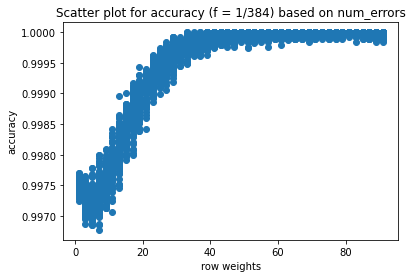

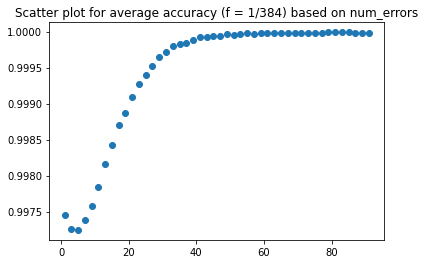

theoretical optimal pool size: 265.822
emperical optimal pool size: 81
entropy for the emperical optimal pool size: 0.702


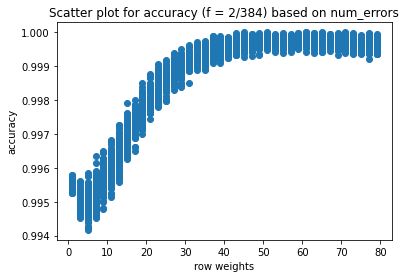

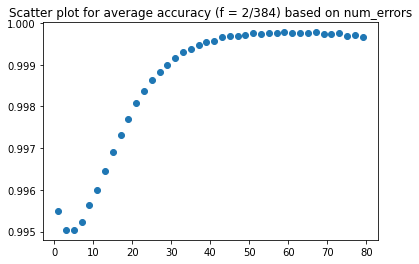

theoretical optimal pool size: 132.737
emperical optimal pool size: 59
entropy for the emperical optimal pool size: 0.834


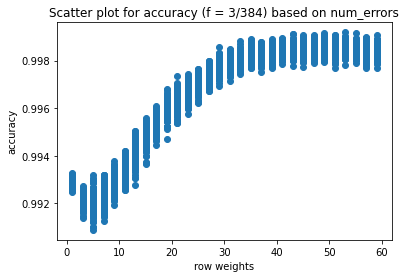

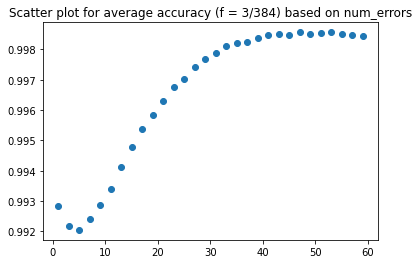

theoretical optimal pool size: 88.376
emperical optimal pool size: 53
entropy for the emperical optimal pool size: 0.925


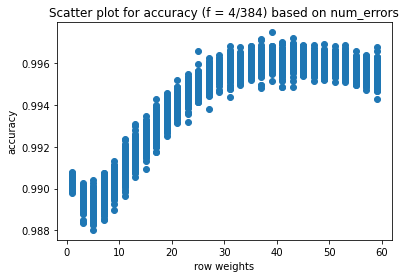

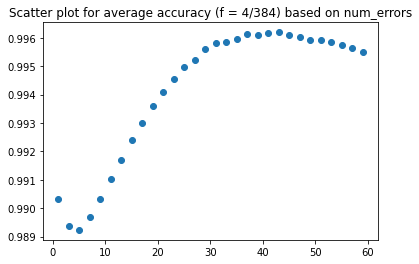

theoretical optimal pool size: 66.195
emperical optimal pool size: 43
entropy for the emperical optimal pool size: 0.945


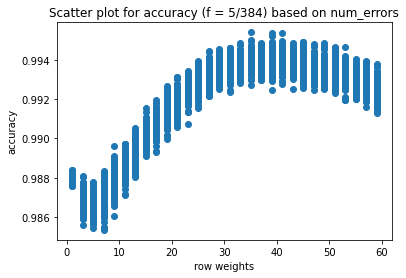

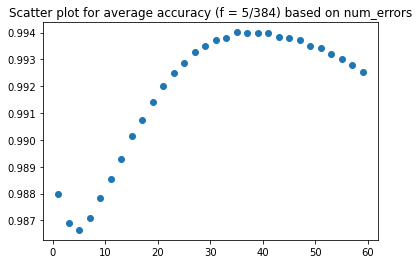

theoretical optimal pool size: 52.886
emperical optimal pool size: 35
entropy for the emperical optimal pool size: 0.949


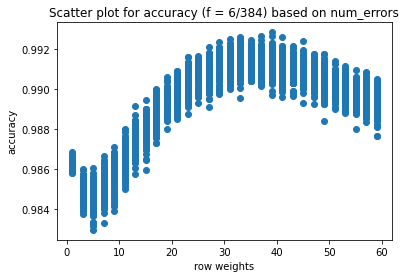

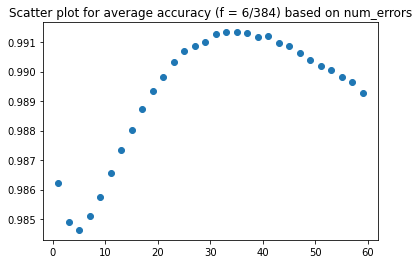

theoretical optimal pool size: 44.014
emperical optimal pool size: 35
entropy for the emperical optimal pool size: 0.983


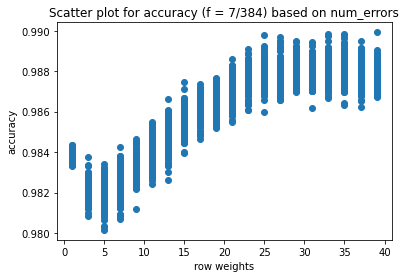

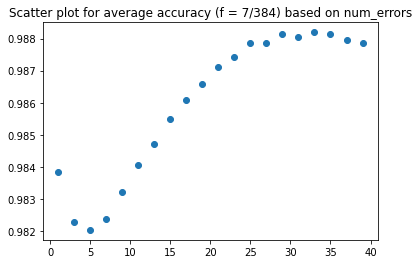

theoretical optimal pool size: 37.676
emperical optimal pool size: 33
entropy for the emperical optimal pool size: 0.994


In [6]:
short_range = [i for i in range(1, 61, 2)]

average_accuracy = plot_accuracy(1, [i for i in range(1, 92, 2)], 'num_errors')
average_accuracy = plot_accuracy(2, [i for i in range(1, 80, 2)], 'num_errors')
for k in range(3, 7): 
    average_accuracy = plot_accuracy(k, short_range, 'num_errors')
average_accuracy = plot_accuracy(7, [i for i in range(1, 41, 2)], 'num_errors')

# Accuracy plot for true positives recovery

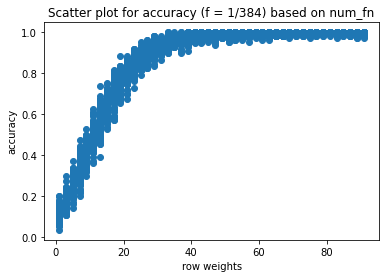

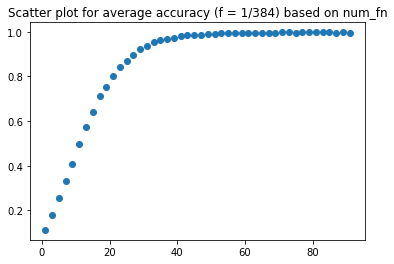

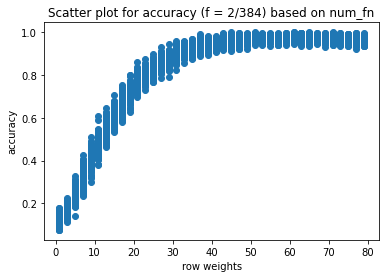

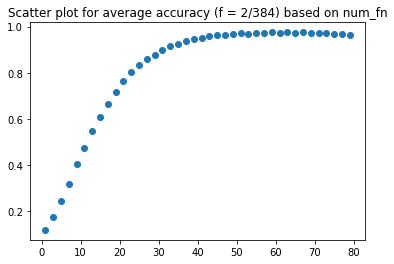

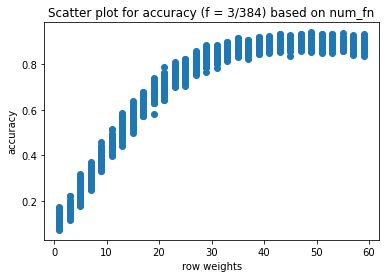

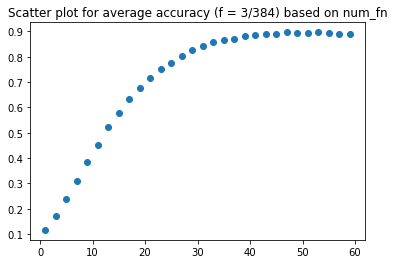

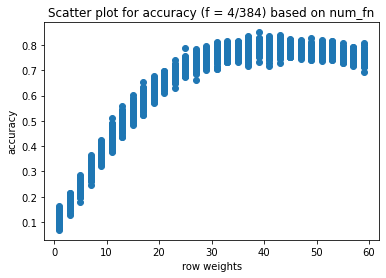

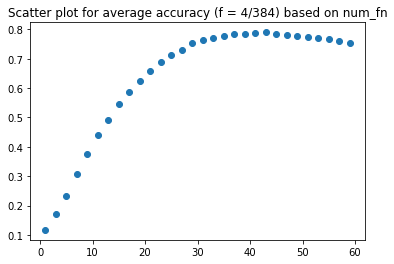

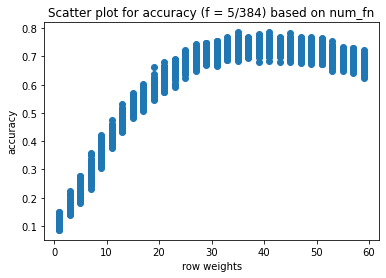

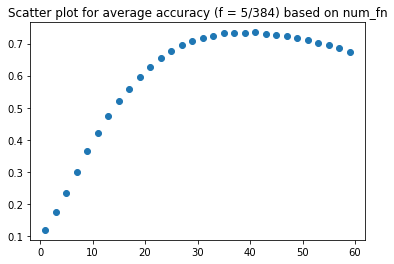

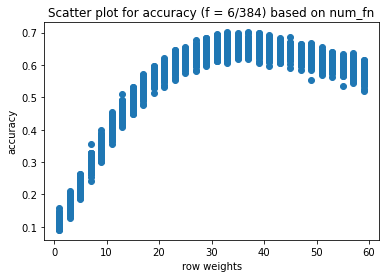

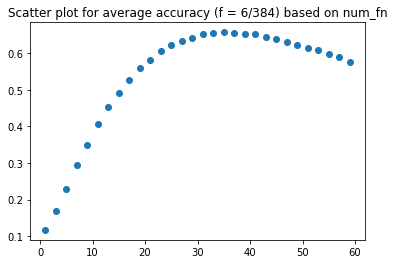

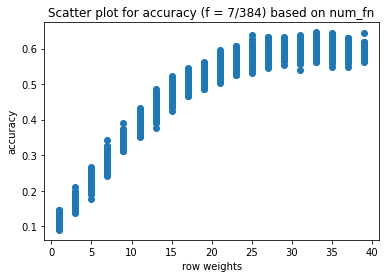

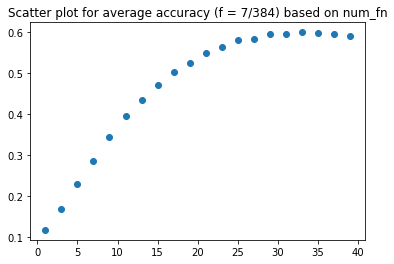

In [7]:
average_accuracy = plot_accuracy(1, [i for i in range(1, 92, 2)], 'num_fn')
average_accuracy = plot_accuracy(2, [i for i in range(1, 80, 2)], 'num_fn')
for k in range(3, 7): 
    average_accuracy = plot_accuracy(k, short_range, 'num_fn')
average_accuracy = plot_accuracy(7, [i for i in range(1, 41, 2)], 'num_fn')


# Accuracy plot for true negatives recovery

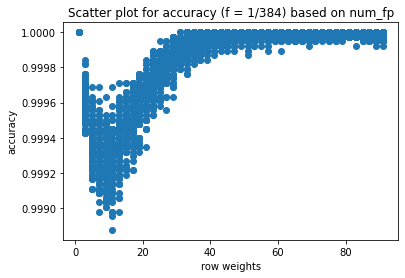

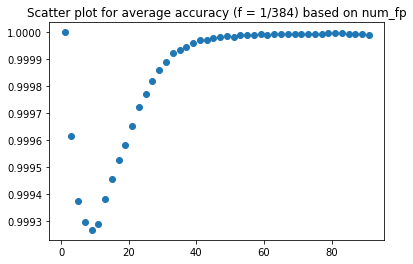

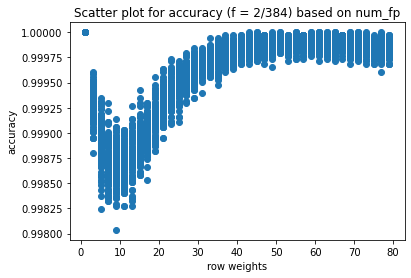

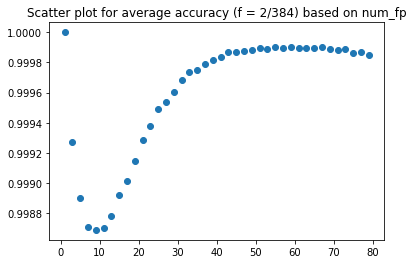

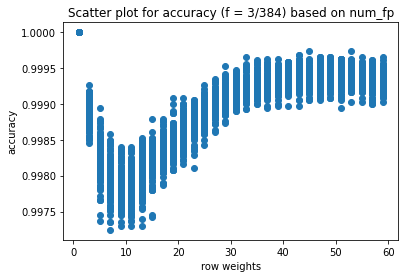

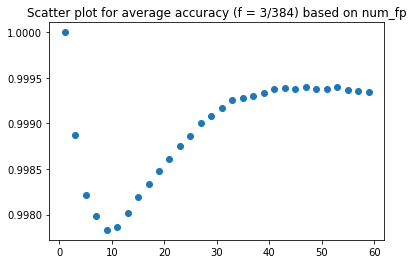

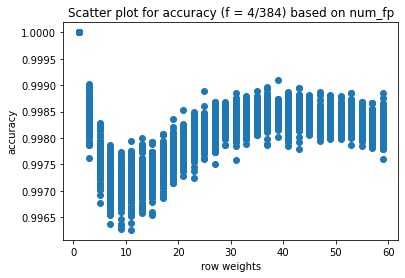

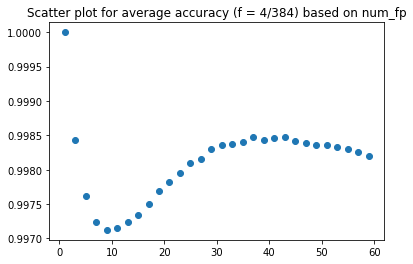

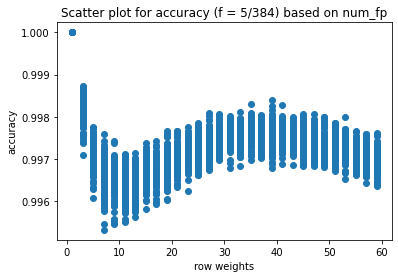

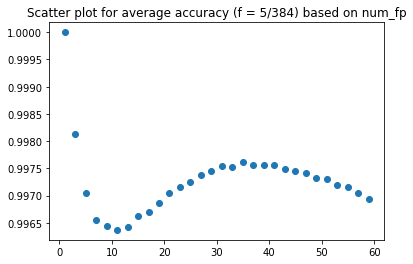

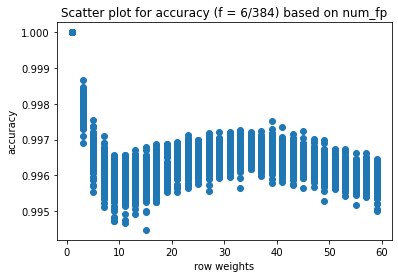

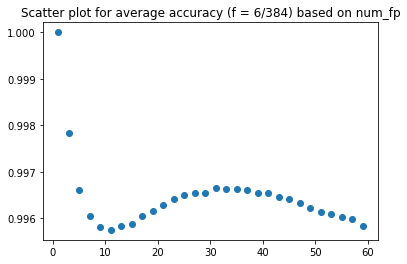

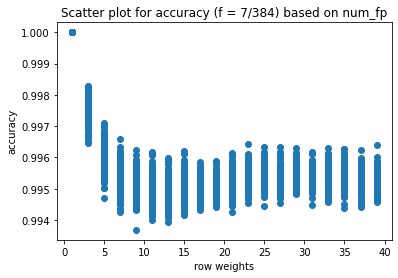

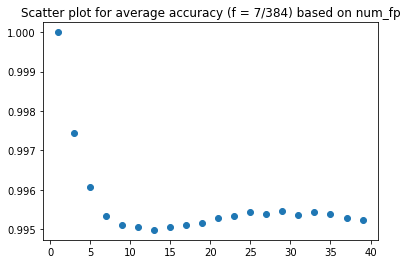

In [8]:
average_accuracy = plot_accuracy(1, [i for i in range(1, 92, 2)], 'num_fp')
average_accuracy = plot_accuracy(2, [i for i in range(1, 80, 2)], 'num_fp')
for k in range(3, 7): 
    average_accuracy = plot_accuracy(k, short_range, 'num_fp')
average_accuracy = plot_accuracy(7, [i for i in range(1, 41, 2)], 'num_fp')